In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
url = 'https://raw.githubusercontent.com/PauloFS01/dataframes/main/reserve.csv'
reserve_df = pd.read_csv(url,parse_dates={'Date': ['Year', 'Month', 'Day']},index_col='Date')
y = reserve_df['Unemployment Rate'].dropna()
y.head()

/tmp/ipykernel_3592/2253502522.py:2: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  reserve_df = pd.read_csv(url,parse_dates={'Date': ['Year', 'Month', 'Day']},index_col='Date')


Date
1954-07-01    5.8
1954-08-01    6.0
1954-09-01    6.1
1954-10-01    5.7
1954-11-01    5.3
Name: Unemployment Rate, dtype: float64

In [3]:
def make_lags(ts, lags,name='y'):
    return pd.concat(
        {
            f'{name}_lag_{i+1}': ts.shift(i+1)
            for i in range(lags)
        },
        axis=1)

df_plot = pd.concat([y, make_lags(y,9)],axis=1).fillna(0)
df_plot.head()

,Unemployment Rate,y_lag_1,y_lag_2,y_lag_3,y_lag_4,y_lag_5,y_lag_6,y_lag_7,y_lag_8,y_lag_9
Date,,,,,,,,,,
1954-07-01,5.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1954-08-01,6.0,5.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1954-09-01,6.1,6.0,5.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1954-10-01,5.7,6.1,6.0,5.8,0.0,0.0,0.0,0.0,0.0,0.0
1954-11-01,5.3,5.7,6.1,6.0,5.8,0.0,0.0,0.0,0.0,0.0


Lag features can make cyrcle apparent

In [4]:
def lag_plot(df):
  lags = df.shape[1] - 1
  for i in range(1,lags):
    sns.regplot(x=f'y_lag_{i}',y='Unemployment Rate',data=df, line_kws={"color": "red"},label=f'y_lag_{i+1}')
    plt.show()

We can observe at lag plots the correlation is mostly linear

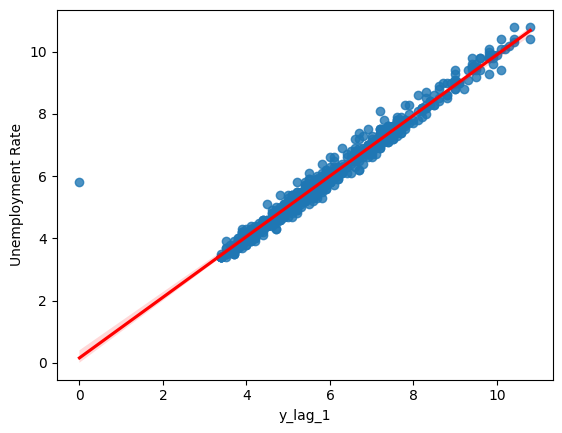

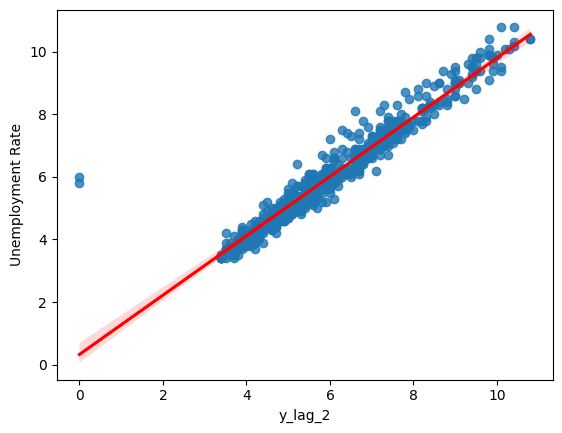

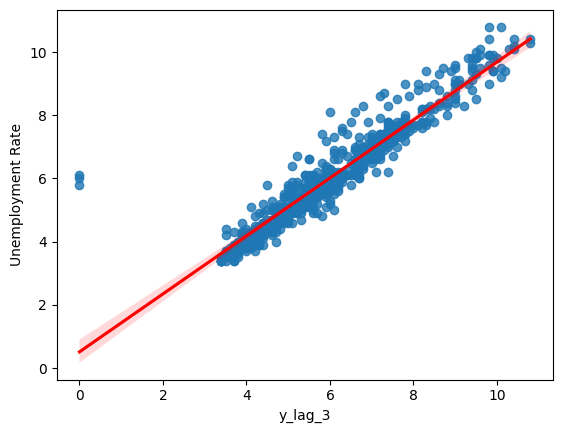

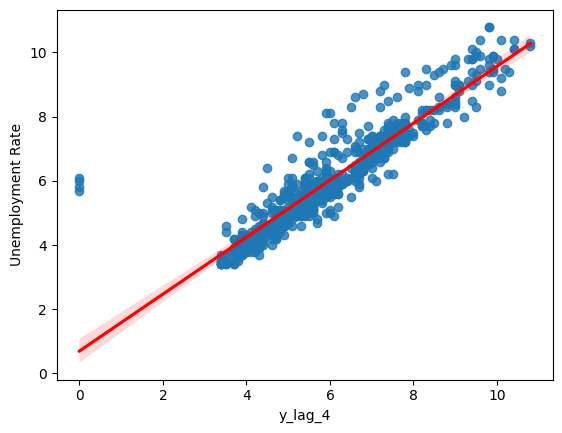

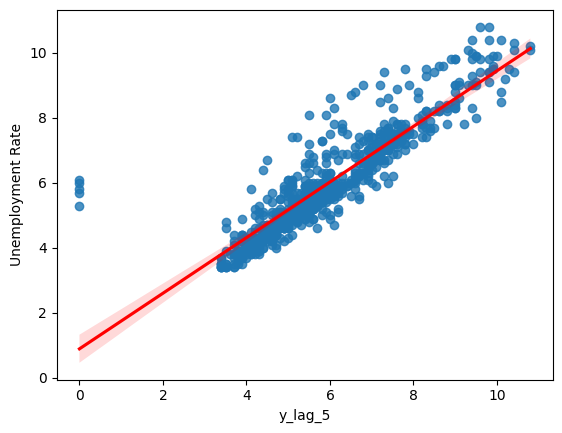

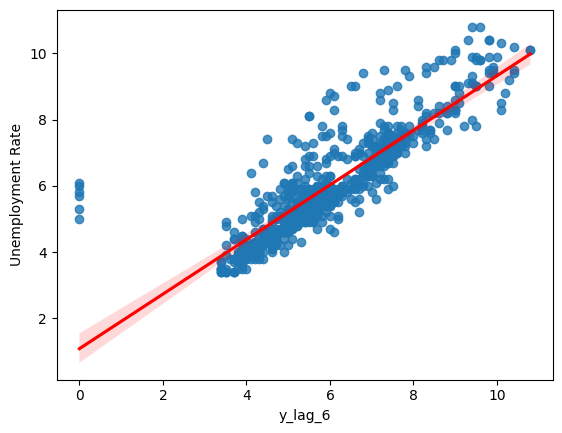

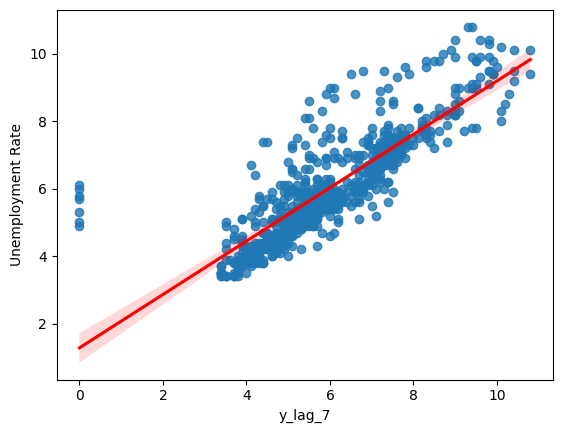

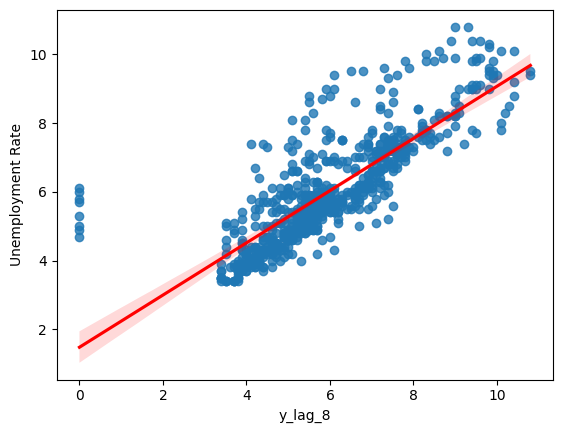

In [5]:
lag_plot(df_plot)

The partial autocorrelation show most correlated features

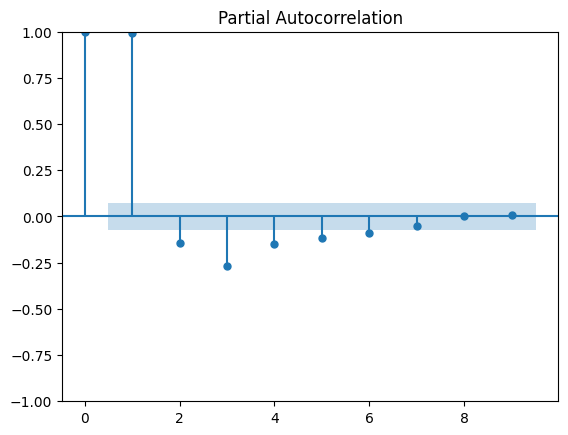

In [4]:
_ = plot_pacf(df_plot['Unemployment Rate'], lags=9)

We can use a simple linear regression to lear cyrcles

In [6]:
X = make_lags(y,6).fillna(0.0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, shuffle=False)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)

Config matplotlib

In [9]:
#plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)

Plot prediction and forecast targets

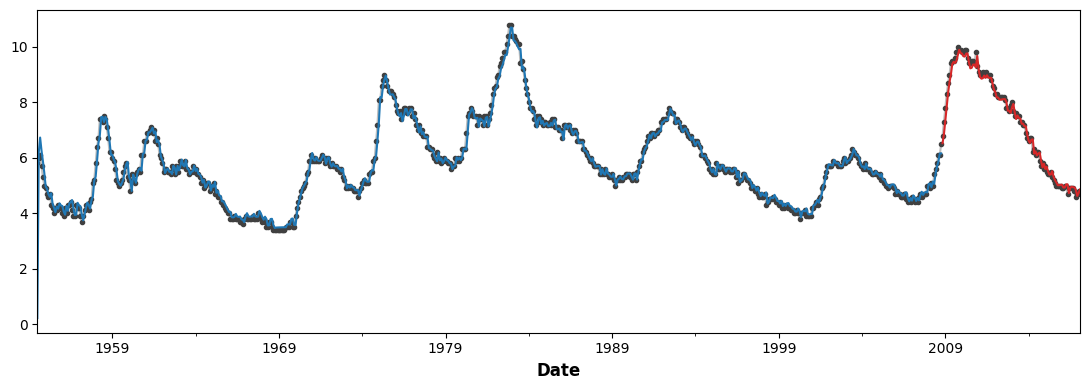

In [11]:
ax = y_train.plot(**plot_params)
ax = y_test.plot(**plot_params)
ax = y_pred.plot(ax=ax)
_ = y_fore.plot(ax=ax, color='C3')

Since lag features has linear relationship linear model are able to forecast this cyrcles, but the forecast need to react sudden at changes, To improve the forecast we could try to find leading indicators

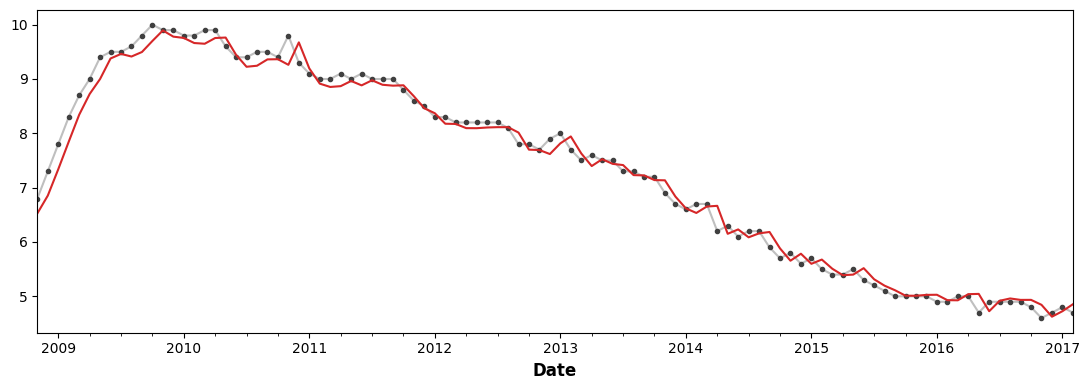

In [12]:
ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax=ax, color='C3')

Lets try industrialization data as lead indicator

In [16]:
url_2 = 'https://raw.githubusercontent.com/PauloFS01/dataframes/main/INDPRO.csv'
df_ind = pd.read_csv(url_2)
df_ind['DATE'] = pd.to_datetime(df_ind['DATE'])
df_ind.set_index('DATE', inplace=True)

We make lags one steap before y lags than concatenate every thing

In [19]:
X1 =  make_lags(df_ind['INDPRO'],5,'ind').fillna(0.0)
X0 =  make_lags(y,6).fillna(0.0)
X = pd.concat([X0,X1],axis=1).dropna()
X.head()

,y_lag_1,y_lag_2,y_lag_3,y_lag_4,y_lag_5,y_lag_6,ind_lag_1,ind_lag_2,ind_lag_3,ind_lag_4,ind_lag_5
1954-07-01,0.0,0.0,0.0,0.0,0.0,0.0,18.6096,18.5542,18.4434,18.5542,18.6649
1954-08-01,5.8,0.0,0.0,0.0,0.0,0.0,18.6372,18.6096,18.5542,18.4434,18.5542
1954-09-01,6.0,5.8,0.0,0.0,0.0,0.0,18.6095,18.6372,18.6096,18.5542,18.4434
1954-10-01,6.1,6.0,5.8,0.0,0.0,0.0,18.6372,18.6095,18.6372,18.6096,18.5542
1954-11-01,5.7,6.1,6.0,5.8,0.0,0.0,18.8588,18.6372,18.6095,18.6372,18.6096


Creat a train test split df

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, shuffle=False)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)

We can se a improvement in 2009 but almost no improvement in the rest of the bar chart

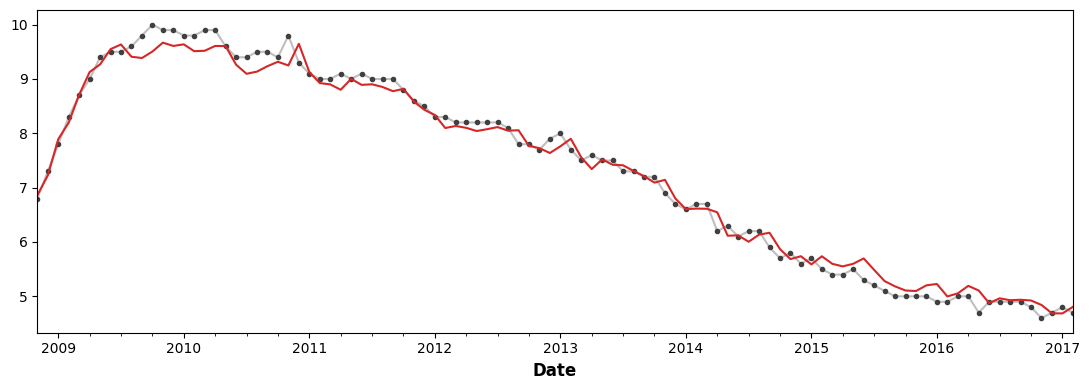

In [23]:
ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax=ax, color='C3')